# Task 1: Write a dynamic function to find the derivative of any function f(x)

In [20]:
#TO DO: Create a function that does a derivative for any function
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sin, lambdify
from scipy.optimize import fsolve
from sympy import symbols, diff, solve, lambdify
from scipy.optimize import minimize, fminbound


def dy_dx(func_str):
    x = sp.symbols('x')
    func = sp.sympify(func_str)
    derivative = sp.diff(func, x)
    return derivative

# Task 2: Test the derivative function written with an equation of your choice
*NB: Must have atleast 2 minimas and atleast 2 maximas*

In [21]:

# Derivative using dy_dx function
func_str = 'sin(x)'  # Corrected minus sign
derivative = dy_dx(func_str)
print(f"The derivative of {func_str} is: {derivative}")



The derivative of sin(x) is: cos(x)


#Task 3: Plot a graph of the Equation must have 4 points (2 minimas and 2 maximas)

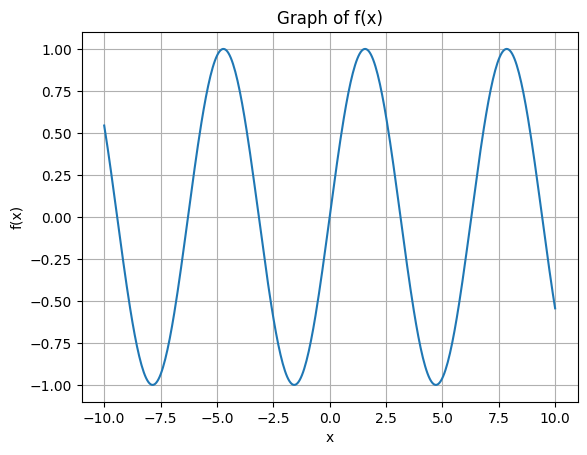

In [22]:


#Create a visualization of the quadratic/algebraic equation
def f(x):
    return  np.sin(x)

# Generate x values
x = np.linspace(-10, 10, 400)
y = f(x)

# Plotting the graph
plt.plot(x, y)
plt.title('Graph of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

# Task 4: Create separate array of Minimas and maximas

In [23]:

# Finding Minimas and Maximas
arr_minimas = []
arr_maximas = []

# Function to find minimas and maximas using numerical optimization
def find_extrema():
    global arr_minimas, arr_maximas

    # First find minimas
    for point in [-1, 3]:
        min_pt = minimize(f, point).x[0]
        arr_minimas.append(min_pt)

    # Then find maximas (using a range)
    for point in np.linspace(-1, 3, 100):
        min_pt = minimize(lambda x: -f(x), point).x[0]
        arr_maximas.append(min_pt)

find_extrema()

Global_maxima = max(arr_maximas, key=f)
Global_minima = min(arr_minimas, key=f)

print(f'The global maxima is {Global_maxima, f(Global_maxima)}')
print(f'The global minima is {Global_minima, f(Global_minima)}')


The global maxima is (1.5707963241745577, 1.0)
The global minima is (-1.5707960651235584, -0.9999999999999658)


# Task 5: Finding the Area under the curve

Critical points: [-1.57079633 -1.57079633  7.85398163  1.57079633  1.57079633  1.57079633
  1.57079633  1.57079633  1.57079633 -7.85398163]
-sin(x)
[-1.5707963267948966, -1.5707963267948852, -7.853981633974309]
[7.853981633974473, 1.5707963267948954, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948966, 1.5707963267948948]


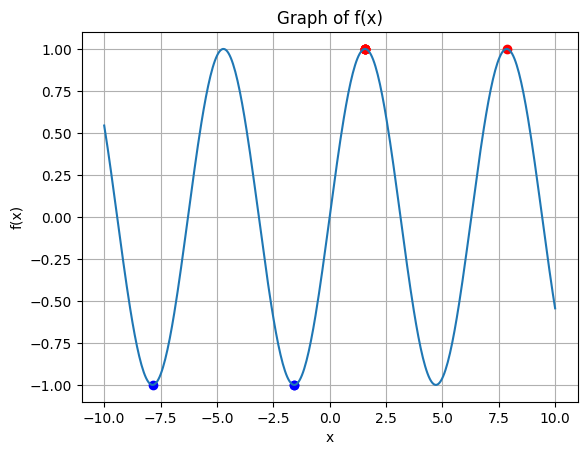

In [24]:
# Find critical points
x = symbols('x')
func = sp.sin(x)
df = diff(func, x)
# Convert sympy expression to a numerical function
f_prime = lambdify(x, df, 'numpy')

# Find numerical solutions for critical points
critical_points = fsolve(f_prime, np.linspace(-1, 3, 10))

print("Critical points:", critical_points)

second_derivative = diff(df, x)
  # print(first_derivative)
print(second_derivative)
minima_list = []
maxima_list = []
# Classify critical points using the second derivative test
for point in critical_points:
    if second_derivative.subs(x, point) > 0:
        minima_list.append(point)
    elif second_derivative.subs(x, point) < 0:
        maxima_list.append(point)
print(minima_list)
print(maxima_list)

minima_y = [func.subs(x, val) for val in minima_list]
maxima_y = [func.subs(x, val) for val in maxima_list]

plt.plot(minima_list, minima_y, 'bo', label='Minima')
plt.plot(maxima_list, maxima_y, 'ro', label='Maxima')

x = np.linspace(-10, 10, 400)
y = f(x)

# Plotting the graph
plt.plot(x, y)
plt.title('Graph of f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [25]:
# Calculate the area under the curve between critical points
areas = []
for i in range(len(critical_points) - 1):
    area, _ = integrate.quad(f, critical_points[i], critical_points[i+1])
    areas.append(abs(area))

total_area = sum(areas)
print(f"Total area under the curve: {total_area}")

Total area under the curve: 1.96927049644778e-13


#Finally, What is the global Minima and the Global maxima _ Plot this so that I can see

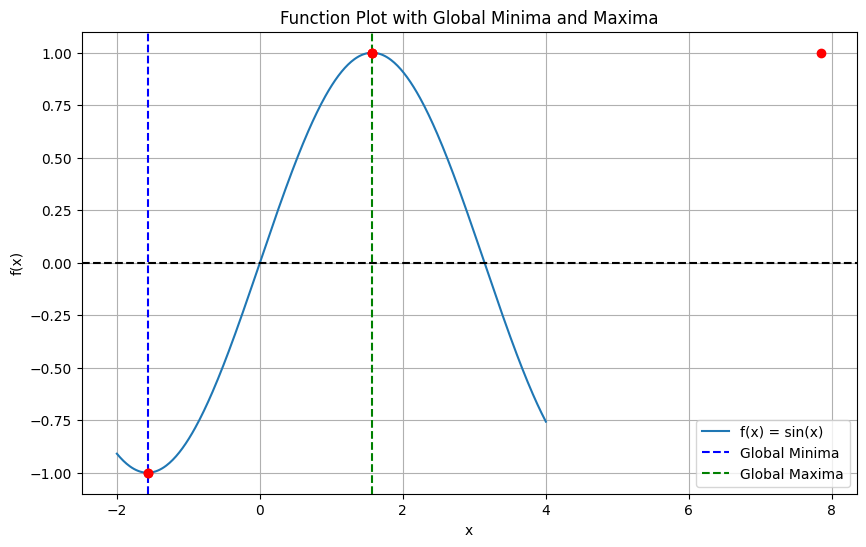

Global Minima: -1.0 at x = -1.5707963267948977
Global Maxima: 1.0 at x = 1.5707963277712451


In [26]:
# Define the function and its derivative
x = symbols('x')
f_expr = sin(x)
f_prime_expr = f_expr.diff(x)

# Convert sympy expressions to numerical functions
f = lambdify(x, f_expr, 'numpy')
f_prime = lambdify(x, f_prime_expr, 'numpy')

# Find numerical solutions for critical points
initial_guesses = np.linspace(-1, 3, 6)  # Reduced to 6 points
critical_points = fsolve(f_prime, initial_guesses)

# Evaluate the function at critical points to find global minima and maxima
critical_values = f(critical_points)
global_min = np.min(critical_values)
global_max = np.max(critical_values)

# Plot the function and highlight the global minima and maxima
x_vals = np.linspace(-2, 4, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x) = sin(x)')
plt.scatter(critical_points, critical_values, color='red', zorder=5)
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=critical_points[np.argmin(critical_values)], color='blue', linestyle='--', label='Global Minima')
plt.axvline(x=critical_points[np.argmax(critical_values)], color='green', linestyle='--', label='Global Maxima')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function Plot with Global Minima and Maxima')
plt.legend()
plt.grid(True)
plt.show()

print(f"Global Minima: {global_min} at x = {critical_points[np.argmin(critical_values)]}")
print(f"Global Maxima: {global_max} at x = {critical_points[np.argmax(critical_values)]}")

# Things trhat may help

We came up with a functon

$$
f(x) = 4x^2 + x^-1
$$

So we create a fucntion in python



```
def f(x):
  #see our code below
```



In [27]:
#This is an Example of a quadratic function
def f(x):
   return (4 * (x** 2)) + (x ** -1)

We manuall calculated the derivative  and got that
$$
df(x)/dx = 8x^1 + x^-2
$$

Using the formula above we find points where the derivative is 0

the values are:

$$
x1 = 0.5, x1 = - 0.5,x1 = 0,
$$

If you replace this in our original formula

$$
f(0.5) = 4(0.5)^2 + (0.5^-1 = -1.0
$$
$$
f(0) = 4x^2 + x^-1 = No solution
$$
$$
f(-0.5) = 4x^2 + x^-1 = 1
$$

Meaning our curve is flat at point $$(0.5,1) $$ and at $$ (-0.5,1)$$

Proof Pending........

Here is how we tried with code and got some errors

In [28]:


# x1 = 0.5
# x2 = -0.5
# x3 = 0

# y1 = f(x1)
# y2 = f(x2)
# y3 = f(x3)

# print(y2)
# (0.5,3)


# **You can now do the Rest.All the Best ........**

**Resources used**


*  (Maximum and minimum)
 https://simple.wikipedia.org/wiki/Maximum_and_minimum#/media/File:Extrema_example_original.svg
*   (sympy documentation)
https://docs.sympy.org/latest/index.html


* (derivatives and integrals)  https://www.coastal.edu/media/academics/universitycollege/mathcenter/handouts/calculus/deranint.PDF

* (Critical Points, Relative Maximum & Minimum Values (Extrema))https://www.youtube.com/watch?v=fjCWGpMgDgw






**Explanations for any errors encountered and how they were resolved.**



https://docs.google.com/document/d/16HzO5_0_Iq5V5--oyoe2SuBo6NlJuxJQBUCDets6OhY/edit